In [12]:
import psycopg2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [15]:
con = psycopg2.connect("dbname=vehicle_repairs user=postgres host=localhost port=5432")

def sql_to_df(sql_query: str):
    return pd.read_sql(sql_query, con)

/Users/stevenmcgrew/anaconda3/lib/python3.9/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


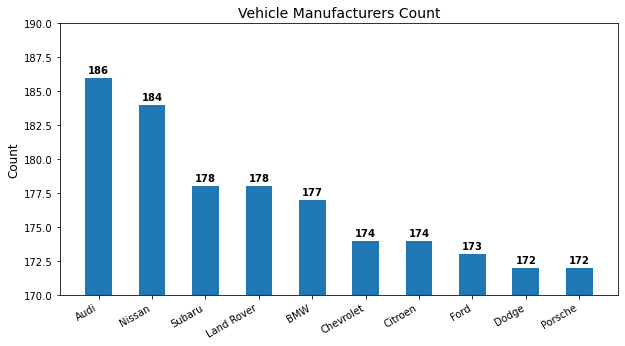

In [37]:
title = "Vehicle Manufacturers Count"
query = """
        SELECT v.make, COUNT(*)
        FROM vehicles v
        GROUP BY v.make
        ORDER BY count DESC
        LIMIT 10;
        """

dataframe = sql_to_df(query)

_fig, axes = plt.subplots(figsize=(10, 5))
axes.set_title(title, fontsize=14)

# get evenly spaced x-axis positions
xpos = np.arange(len(dataframe))

# at each x, add bar (height based on count data)
bars = axes.bar(xpos, dataframe["count"], width=0.50)

# at each x, add tick mark
axes.set_xticks(xpos)

# at each x, add label
axes.set_xticklabels(dataframe["make"])

# label y-axis
axes.set_ylabel("Count", fontsize=12)

# adjust y-axis range
axes.set_ylim(ymin=170, ymax=190)

# rotate x-axis labels to prevent overlap
plt.setp(axes.get_xticklabels(), rotation=30, horizontalalignment='right')

# add data labels
for bar in bars:
    height = bar.get_height()
    axes.annotate(f"{height}",
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha="center", va="bottom",
                fontweight="semibold")